In [16]:
import datetime
import os
import pandas as pd
import numpy as np
import time
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_weater = pd.read_csv('../data_processing/qualifiying/weather/output/qualifiying_weather.csv')

In [7]:
df_weater.head()

,gp_title,year,clean_weather,round,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy
0,Belgian Grand Prix,2023,dry,12,0,0,1,0,0
1,Hungarian F1 Grand Prix,2023,dry,11,0,0,1,0,0
2,British F1 Grand Prix,2023,"wet,dry",10,0,0,1,1,0
3,Austrian F1 Grand Prix,2023,dry,9,0,0,1,0,0
4,Canadian F1 Grand Prix,2023,wet,8,0,0,0,1,0


In [8]:
df_driver_data = pd.read_csv('../data_processing/qualifiying/output/driver_data.csv')

In [11]:
df_driver_data.head()

,year,round,circuit_id,driver,date_of_birth,nationality,constructor,driver_number,time,status,points,podium,position,team,laps,qualifiying_time,have_pole_position,is_in_qualifiying_top5,is_in_Q3
0,2011,1,albert_park,Sebastian Vettel,1987-07-03,German,red_bull,5.0,5370259.0,Finished,25.0,1,1,RED BULL RACING RENAULT,16,1:23.529,True,True,True
1,2011,1,albert_park,Lewis Hamilton,1985-01-07,British,mclaren,44.0,5392556.0,Finished,18.0,2,2,MCLAREN MERCEDES,19,1:24.307,False,True,True
2,2011,1,albert_park,Vitaly Petrov,1984-09-08,Russian,renault,NaN,5400819.0,Finished,15.0,3,6,RENAULT,18,1:25.247,False,False,True
3,2011,1,albert_park,Fernando Alonso,1981-07-29,Spanish,ferrari,14.0,5402031.0,Finished,12.0,4,5,FERRARI,19,1:24.974,False,True,True
4,2011,1,albert_park,Mark Webber,1976-08-27,Australian,red_bull,NaN,5408430.0,Finished,10.0,5,3,RED BULL RACING RENAULT,15,1:24.395,False,True,True


In [25]:
merged_df = pd.merge(df_weater, df_driver_data, on='year', how='inner')

In [30]:
merged_df.head()

,gp_title,year,clean_weather,round_x,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,round_y,...,status,points,podium,position,team,laps,qualifiying_time,have_pole_position,is_in_qualifiying_top5,is_in_Q3
0,Belgian Grand Prix,2023,dry,12,0,0,1,0,0,1,...,Finished,25.0,1,1,RED BULL RACING HONDA RBPT,15,1:29.708,True,True,True
1,Belgian Grand Prix,2023,dry,12,0,0,1,0,0,1,...,Finished,18.0,2,2,RED BULL RACING HONDA RBPT,15,1:29.846,False,True,True
2,Belgian Grand Prix,2023,dry,12,0,0,1,0,0,1,...,Finished,15.0,3,5,ASTON MARTIN ARAMCO MERCEDES,15,1:30.336,False,True,True
3,Belgian Grand Prix,2023,dry,12,0,0,1,0,0,1,...,Finished,12.0,4,4,FERRARI,18,1:30.154,False,True,True
4,Belgian Grand Prix,2023,dry,12,0,0,1,0,0,1,...,Finished,10.0,5,7,MERCEDES,15,1:30.384,False,False,True


In [26]:
merged_df.columns

Index(['gp_title', 'year', 'clean_weather', 'round_x', 'weather_warm',
       'weather_cold', 'weather_dry', 'weather_wet', 'weather_cloudy',
       'round_y', 'circuit_id', 'driver', 'date_of_birth', 'nationality',
       'constructor', 'driver_number', 'time', 'status', 'points', 'podium',
       'position', 'team', 'laps', 'qualifiying_time', 'have_pole_position',
       'is_in_qualifiying_top5', 'is_in_Q3'],
      dtype='object')

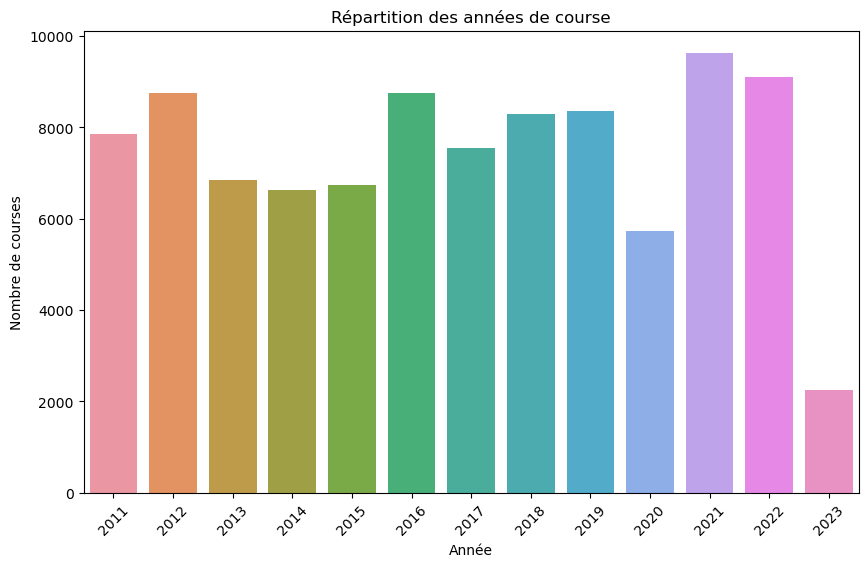

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='year')
plt.title('Répartition des années de course')
plt.xlabel('Année')
plt.ylabel('Nombre de courses')
plt.xticks(rotation=45)
plt.show()

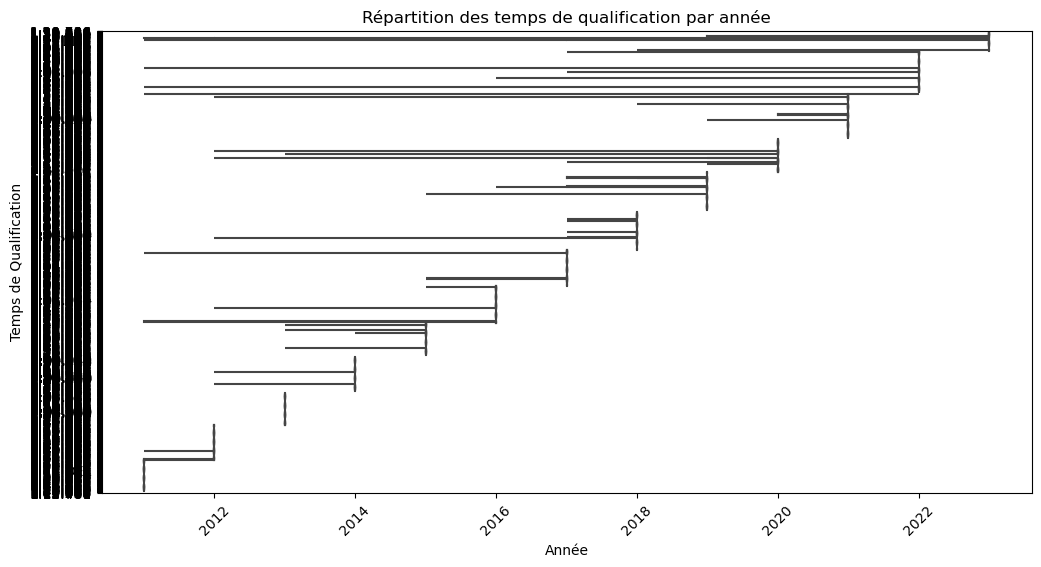

In [40]:
# Visualisation des temps de qualification
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='year', y='qualifiying_time')
plt.title('Répartition des temps de qualification par année')
plt.xlabel('Année')
plt.ylabel('Temps de Qualification')
plt.xticks(rotation=45)
plt.show()

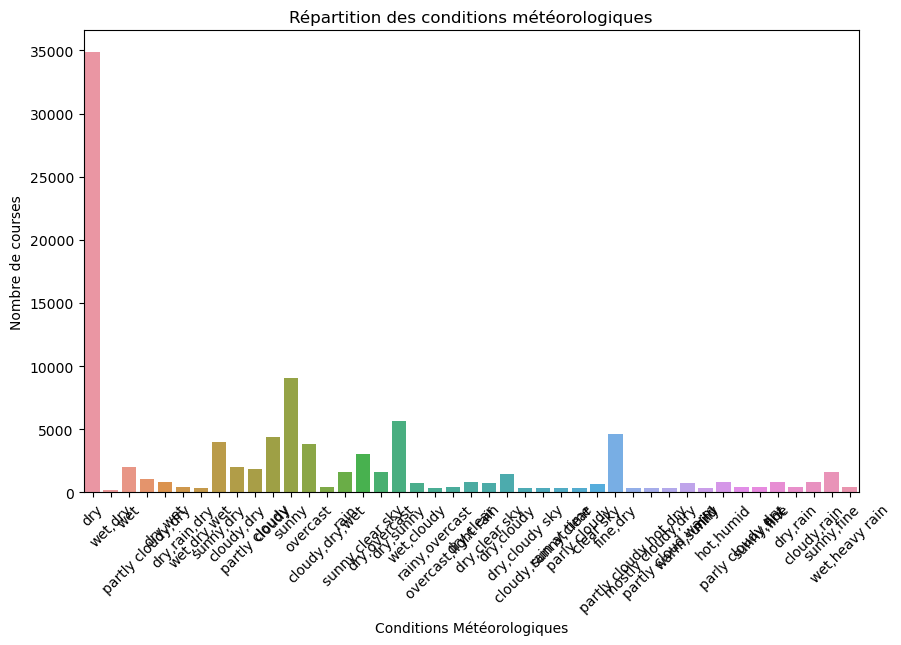

In [29]:
# Visualisation de la météo
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='clean_weather')
plt.title('Répartition des conditions météorologiques')
plt.xlabel('Conditions Météorologiques')
plt.ylabel('Nombre de courses')
plt.xticks(rotation=45)
plt.show()

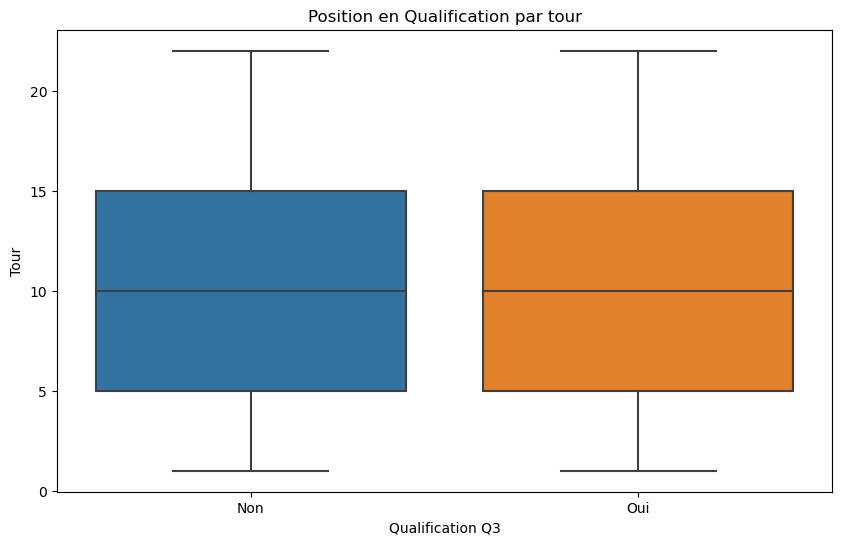

In [32]:
# Visualisation de la position en qualification
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='is_in_Q3', y='round_x')
plt.title('Position en Qualification par tour')
plt.xlabel('Qualification Q3')
plt.ylabel('Tour')
plt.xticks([0, 1], ['Non', 'Oui'])
plt.show()

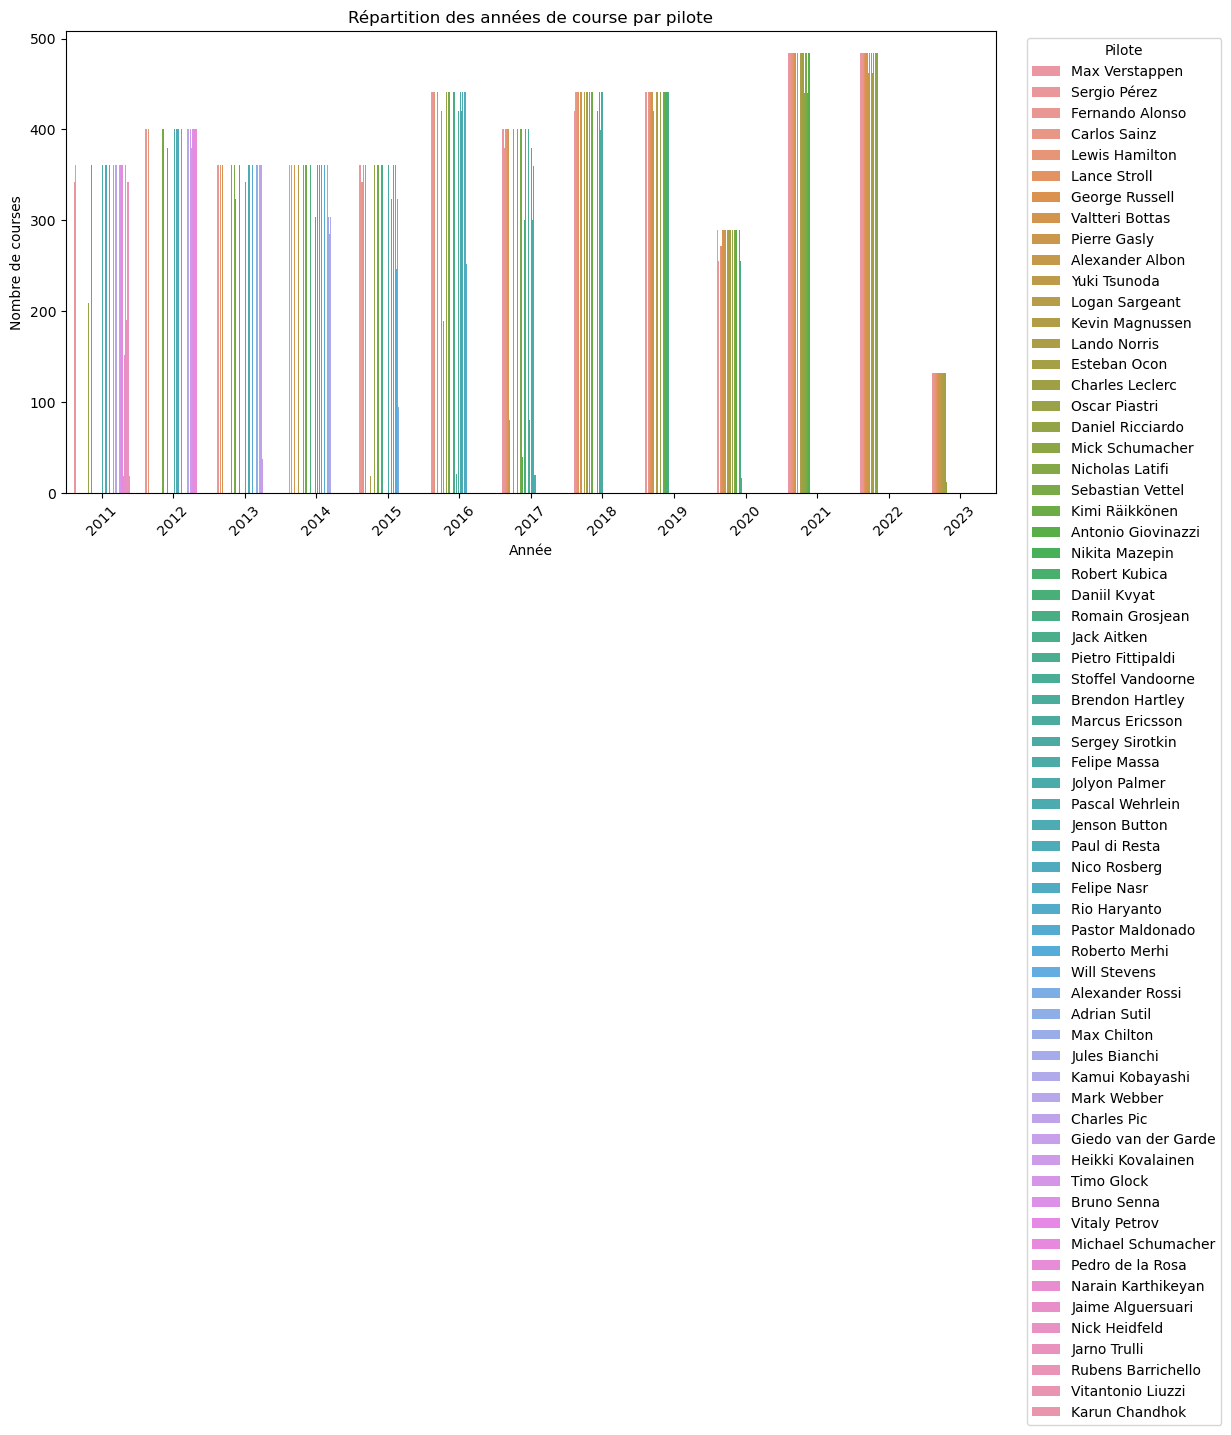

In [33]:
# Regrouper les données par pilote (driver)
grouped_by_driver = merged_df.groupby('driver')

# Visualisation de la répartition des années par pilote
plt.figure(figsize=(12, 6))
sns.countplot(data=merged_df, x='year', hue='driver')
plt.title('Répartition des années de course par pilote')
plt.xlabel('Année')
plt.ylabel('Nombre de courses')
plt.xticks(rotation=45)
plt.legend(title='Pilote', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()